<a href="https://colab.research.google.com/github/kallyfuu/EDA_FundamentosML_FelipeOlavarria/blob/main/EDA_FundamentosML_FelipeOlavarria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# importa las librerías a nuestro entorno de trabajo

import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns # es para graficar
import io

In [18]:
try:
    df = pd.read_csv('data.csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
# datos interesantes de los datos numericos de el dataframe
display(df.describe())

# Muesta el tamaño de el dataframe tanto en filas como en columnas
print(f"\n Tamaño del DataFrame: {df.shape}")

# Busca datos faltantes dentro de el dataframe
print("\nValores nulos por columna:\n", df.isnull().sum())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



 Tamaño del DataFrame: (541909, 8)

Valores nulos por columna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## Data cleaning

Ahora se hace una limpieza de los datos como datos faltantes o asegurar de que algunos datos sean mayores q 0 para no dar errores}

In [14]:
# Esta función se utiliza para eliminar filas con valores faltantes.
df.dropna(subset=['Description', 'CustomerID'], inplace=True)

# Esta función convierte la columna 'InvoiceDate' al tipo de datos datetime adecuado, lo que permite el análisis basado en el tiempo.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df.dropna(subset=['InvoiceDate'], inplace=True)

# filtra el DataFrame para mantener solo las filas donde la 'Quantity' es mayor que 0.
df = df[df['Quantity'] > 0]

#  filtra el DataFrame para mantener solo las filas donde 'UnitPrice' es mayor que 0
df = df[df['UnitPrice'] > 0]

# Elimina las filas duplicadas
df.drop_duplicates(inplace=True)

## Data wrangling

### Subtask:
Prepare los datos para el análisis creando las columnas derivadas necesarias y asegurando los tipos de datos correctos.

In [15]:
# Crea una nueva columna en la que pone el valor total del producto
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Control de errores en TotalAmount  (reemplazar valores no numéricos con 0)
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce').fillna(0)

# Separa los datos de la fecha por año , mes , dia
df['Year'] = df['InvoiceDate'].dt.year.astype(int)
df['Month'] = df['InvoiceDate'].dt.month.astype(int)
df['Day'] = df['InvoiceDate'].dt.day.astype(int)

display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1


## Analysis de los datos

Realicé un análisis de datos descriptivos sobre los datos preparados para obtener información sobre el ticket promedio, los productos más vendidos, las diferencias por país y las tendencias temporales.

**Reasoning**:
Calculate the average ticket, best-selling products, country-wise differences, and temporal trends based on the provided dataframe.



In [16]:
# 1. Promedio de el valor de el Ticket
average_ticket = df['TotalAmount'].mean()
print(f"Promedio de el ticket {average_ticket}")

# 2. Productos mejor vendidos
top_selling_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\n Top 10 Productos mejor vendidos:\n", top_selling_products)

# 3. calcula la media y la suma de 'TotalAmount' para cada país.
country_stats = df.groupby('Country')['TotalAmount'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False).head(5)
print("\n Top 5 Countries by Total Sales:\n", country_stats)

# Productos mas vendidos en cada pais
best_selling_per_country = df.groupby(['Country', 'StockCode'])['Quantity'].sum().reset_index()
best_selling_per_country = best_selling_per_country.loc[best_selling_per_country.groupby('Country')['Quantity'].idxmax()]
print("\n Productos mas vendidos en cada pais:\n", best_selling_per_country)

# 4. calcula las ventas totales mensuales
monthly_sales = df.groupby(['Year', 'Month'])['TotalAmount'].sum()
print("\n total de ventas mensuales:\n", monthly_sales)

Promedio de el ticket 22.6314997351614

 Top 10 Productos mejor vendidos:
 StockCode
23843     80995
23166     77916
84077     54319
22197     49160
85099B    46078
85123A    36763
84879     35263
21212     33670
23084     27153
22492     26076
Name: Quantity, dtype: int64

 Top 5 Countries by Total Sales:
                       mean          sum
Country                                
United Kingdom   20.861862  7285024.644
Netherlands     121.003111   285446.340
EIRE             36.709446   265262.460
Germany          25.338327   228678.400
France           25.094200   208934.310

 Productos mas vendidos en cada pais:
                     Country StockCode  Quantity
223               Australia     22492      2952
674                 Austria     21918       288
912                 Bahrain     23076        96
1009                Belgium     21212       480
1705                 Brazil     21430        24
1848                 Canada     37370       504
1953        Channel Islands     217

## Data visualization

### Subtask:
Create visualizations to represent the key findings from the data analysis.


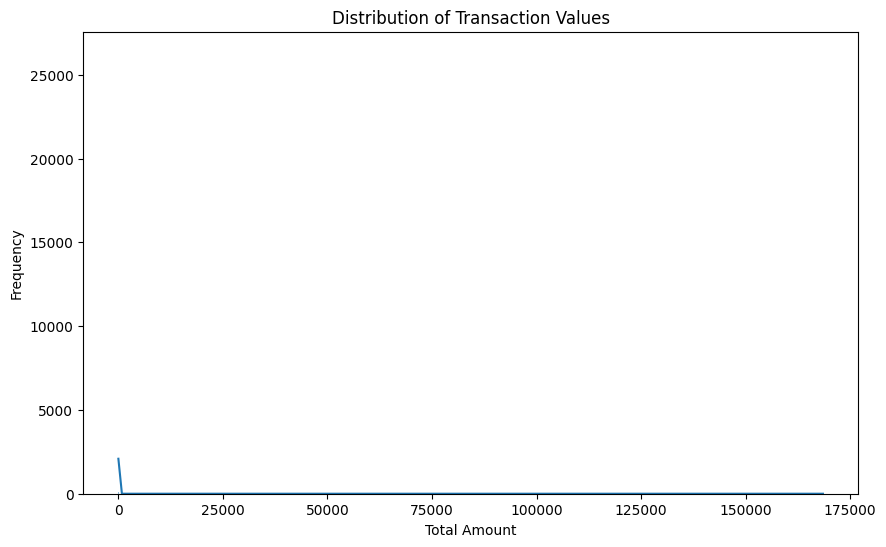

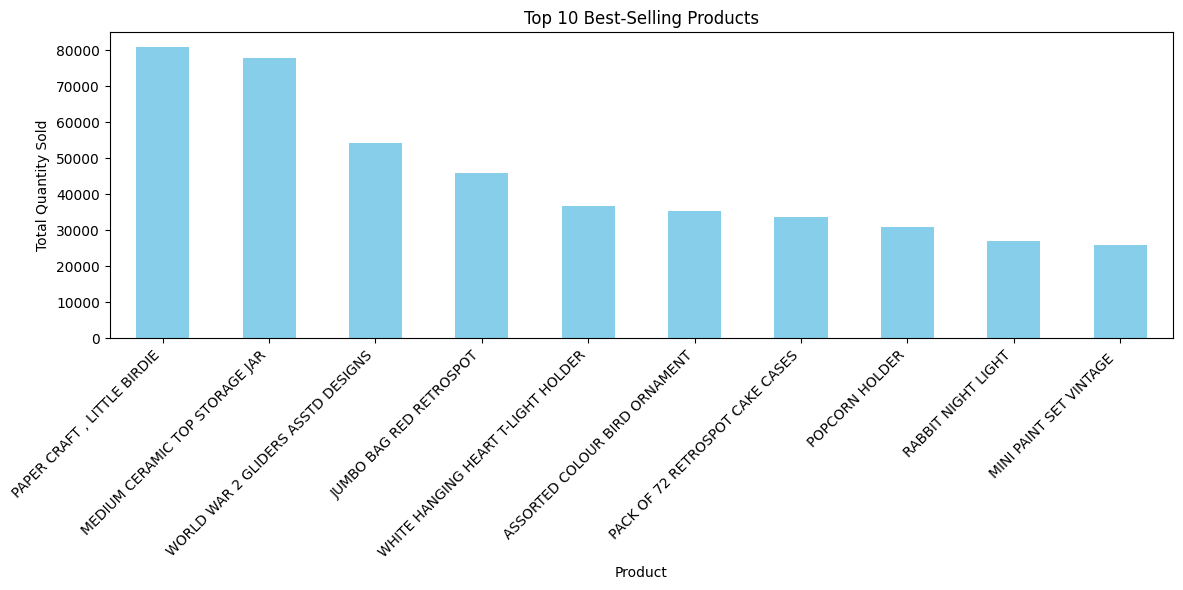

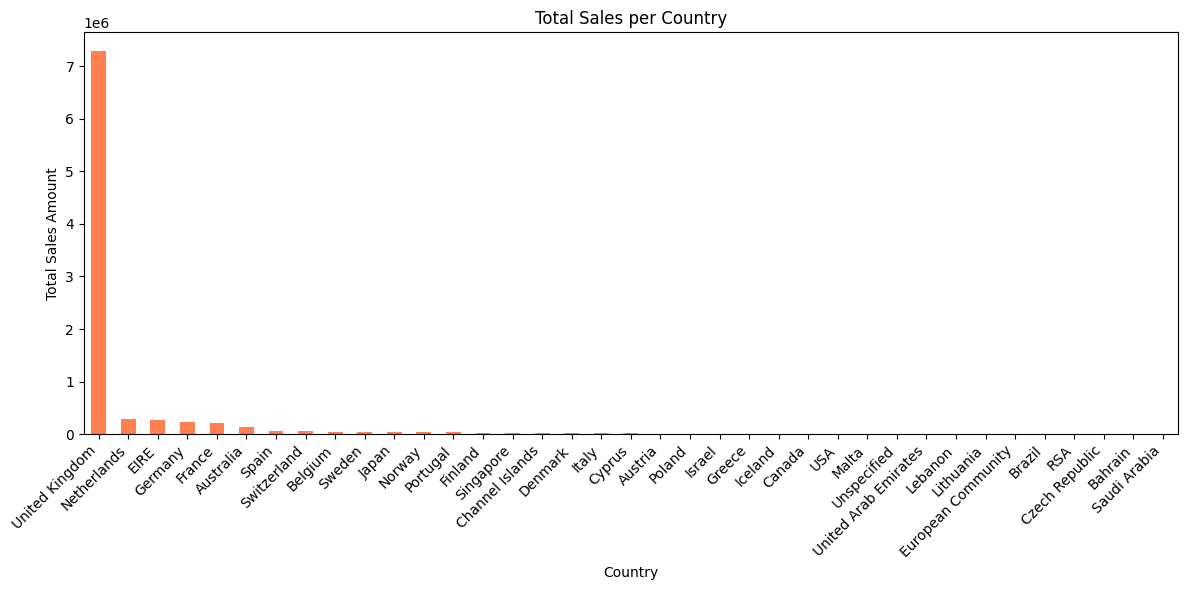

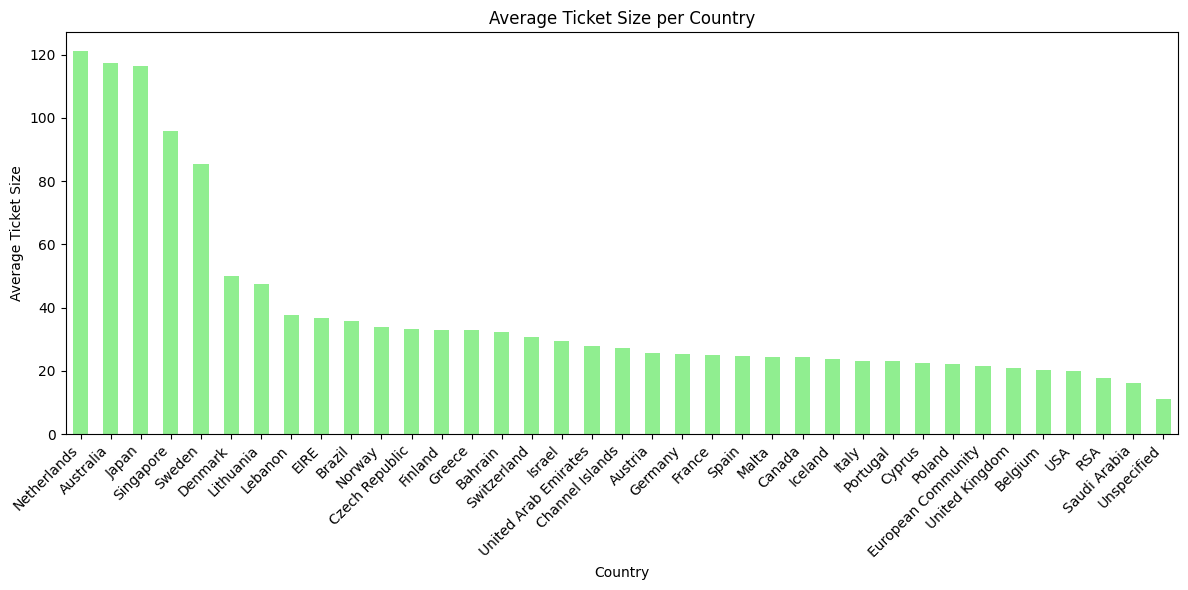

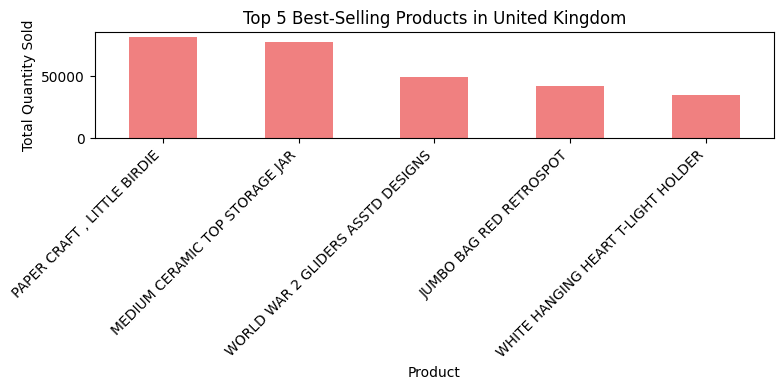

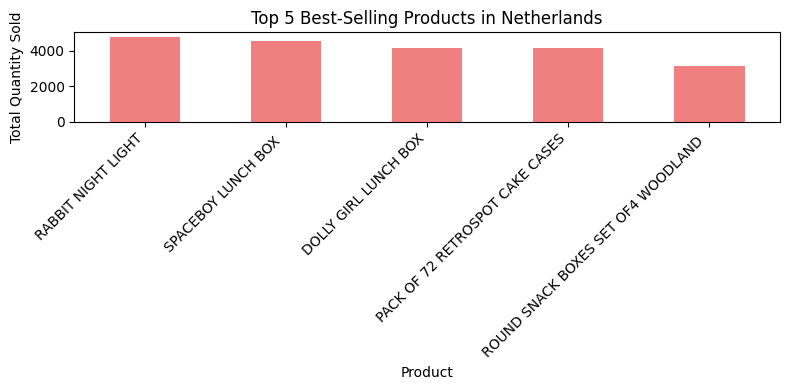

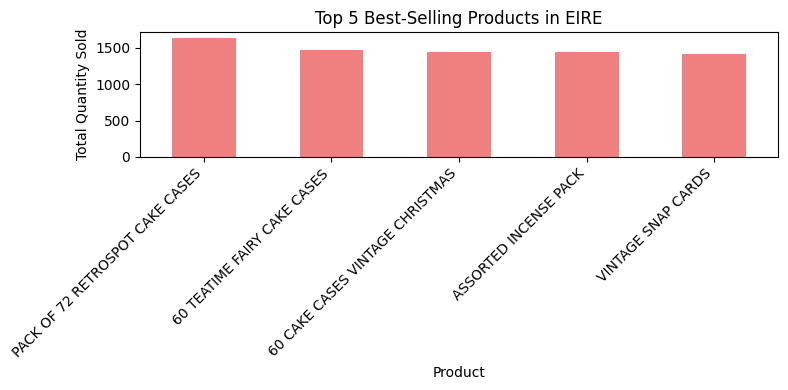

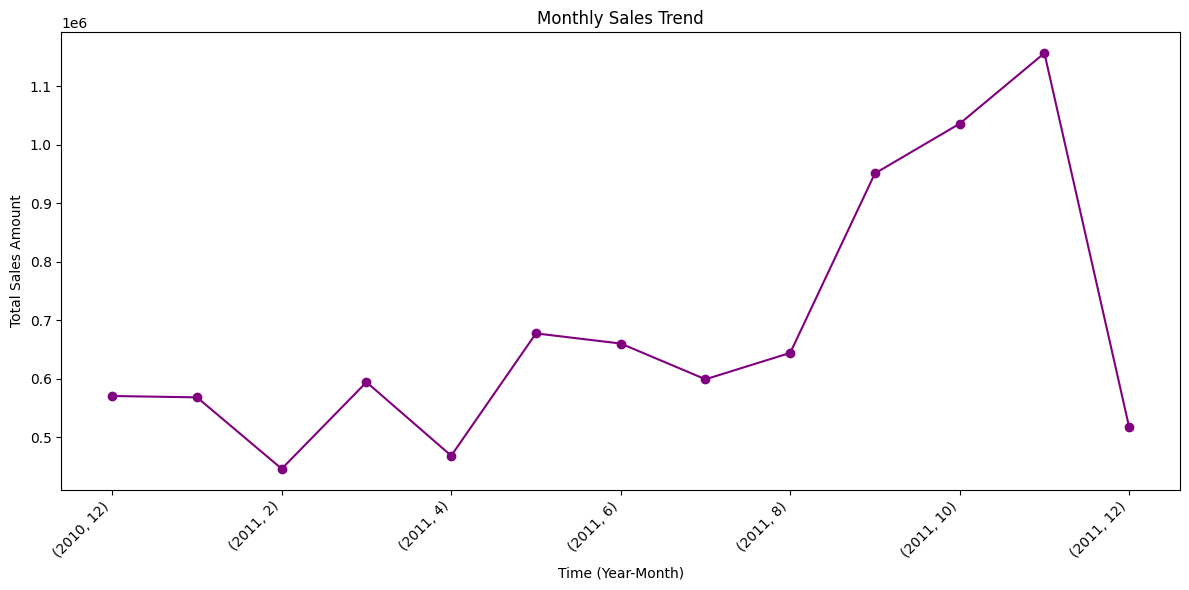

In [7]:
# 1. Average Ticket: Histogram of TotalAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalAmount'], kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Best-Selling Products: Bar plot of top 10 products
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Country-Wise Differences
# Total sales per country
plt.figure(figsize=(12, 6))
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', color='coral')
plt.title('Total Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average ticket size per country
plt.figure(figsize=(12, 6))
country_avg_ticket = df.groupby('Country')['TotalAmount'].mean().sort_values(ascending=False)
country_avg_ticket.plot(kind='bar', color='lightgreen')
plt.title('Average Ticket Size per Country')
plt.xlabel('Country')
plt.ylabel('Average Ticket Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 5 best-selling products for each country (example for the top 3 countries)
top_countries = country_sales.head(3).index
for country in top_countries:
    top_products_country = df[df['Country'] == country].groupby('Description')['Quantity'].sum().nlargest(5)
    plt.figure(figsize=(8, 4))
    top_products_country.plot(kind='bar', color='lightcoral')
    plt.title(f'Top 5 Best-Selling Products in {country}')
    plt.xlabel('Product')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Temporal Trends: Monthly sales over time
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(['Year', 'Month'])['TotalAmount'].sum()
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

* **What is the average ticket size?** The average transaction value (TotalAmount) is approximately 22.63.
* **Which are the best-selling products?**  The top 10 best-selling products (based on Quantity) were identified, with '23843' being the best-selling product.  More details are available in the visualizations.
* **How do sales differ across countries?** The UK has the highest total sales, followed by the Netherlands, EIRE, Germany, and France.  Visualizations provide further insights into total sales and average ticket size per country, as well as the top-selling products in each of the top 3 countries.
* **What are the temporal trends in sales?** Monthly sales trends from December 2010 to December 2011 were calculated, showing fluctuations in sales over time, with November 2011 exhibiting the highest sales. A line plot further visualizes this trend.


### 2. Data Analysis Key Findings

* **Average transaction value:** The average ticket is approximately 22.63.
* **Top selling product:** Product '23843' is the best-selling product based on total quantity sold.
* **Top performing countries:** The UK, Netherlands, EIRE, Germany, and France are the top 5 countries by total sales.  The UK shows the highest total sales.
* **Monthly sales trend:** Sales fluctuate over time, with November 2011 showing the highest sales.


### 3. Insights or Next Steps

* **Investigate high-value transactions:** Analyze the distribution of `TotalAmount` to identify and understand unusually high transaction values to see if there are any patterns that can explain them.
* **Deep dive into product performance:** Explore the characteristics of best-selling products (e.g., category, price, etc.) and investigate the best-selling products in each country to identify potential product-market fit opportunities.
